In [4]:
%load_ext autoreload
%autoreload 2


%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts')
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')
from clust_huge_amp import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading components...


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/2227764546.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!


In [7]:

# Subset the data
Y_100k, E_100k, G_100k, indices = subset_data(Y, E, G, start_index=0, end_index=10000)


# Load the # When initializing the model:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

readRDS = robjects.r['readRDS']
pce_data = readRDS('/Users/sarahurbut/Library/Cloudstorage/Dropbox-Personal/pce_df_prevent.rds')
pce_df = pandas2ri.rpy2py(pce_data)  # Convert to pandas DataFrame




# first with joint phi


In [ ]:
# Get enrollment ages
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/3894083213.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


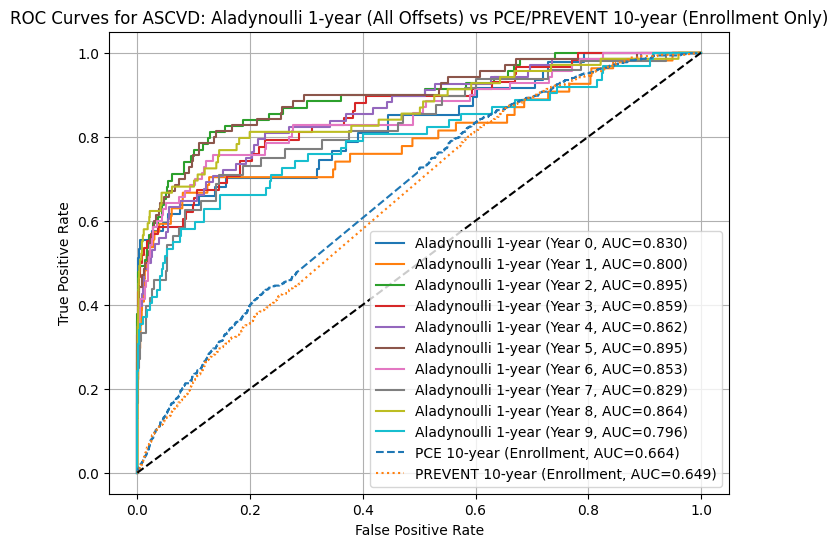

In [10]:
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()

# Load all batch predictions into a list
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox/offset_joint_phi/pis/pi_enroll_age_offset_{k}_sex_0_10000_try2_withpcs.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/2875735811.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


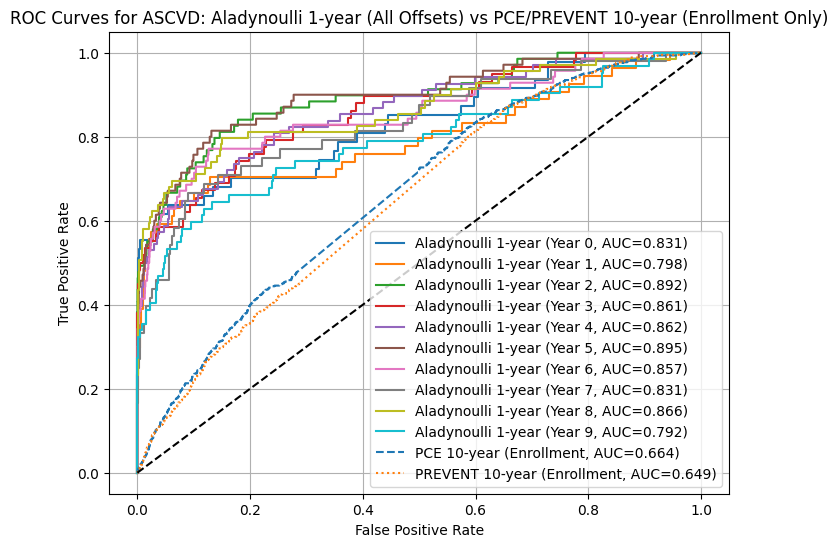

In [11]:
### old code # Get enrollment ages
years_to_use = 10
disease_names = essentials['disease_names']

enrollment_ages = pce_df['age'].to_numpy()

# Load all batch predictions into a list
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pi_enroll_age_offset_{k}_sex_0_10000.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)

## Now wiht fixed phi

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/2272641968.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


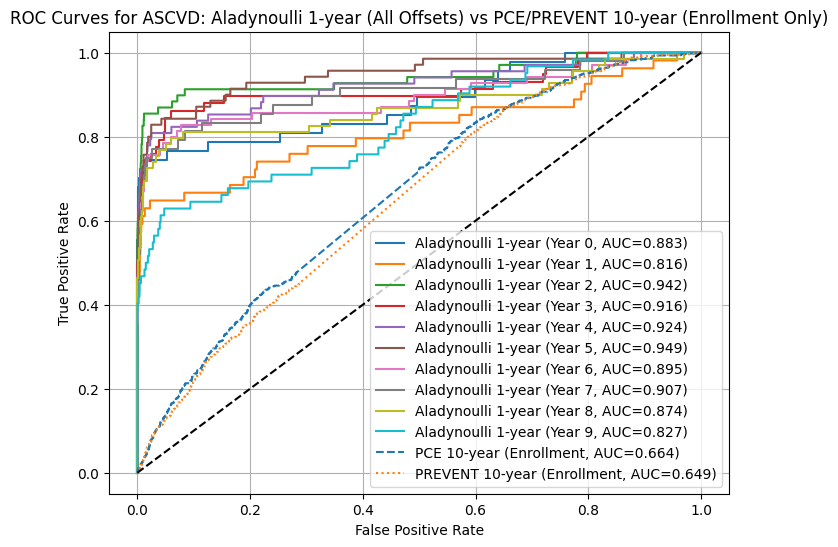

In [ ]:

# old fixed phi
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pi_enroll_fixedphi_age_offset_{k}_sex_0_10000_try2.pt")
   for k in range(years_to_use)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)



/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_14640/3223307995.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f"/Users/sarahurbut/Library/CloudS

PCE available: True, PREVENT available: True
Patients with valid PCE scores: 10000/10000 (100.0%)
Patients with valid PREVENT scores: 10000/10000 (100.0%)
Offset 0: Included patients: 9556, 1-year Events: 47
  PCE patients: 9556, PREVENT patients: 9556, 10-year Events: 615
Offset 1: Included patients: 9509, 1-year Events: 54
Offset 2: Included patients: 9455, 1-year Events: 69
Offset 3: Included patients: 9386, 1-year Events: 58
Offset 4: Included patients: 9328, 1-year Events: 68
Offset 5: Included patients: 9260, 1-year Events: 70
Offset 6: Included patients: 9190, 1-year Events: 70
Offset 7: Included patients: 9120, 1-year Events: 48
Offset 8: Included patients: 9072, 1-year Events: 69
Offset 9: Included patients: 9003, 1-year Events: 62


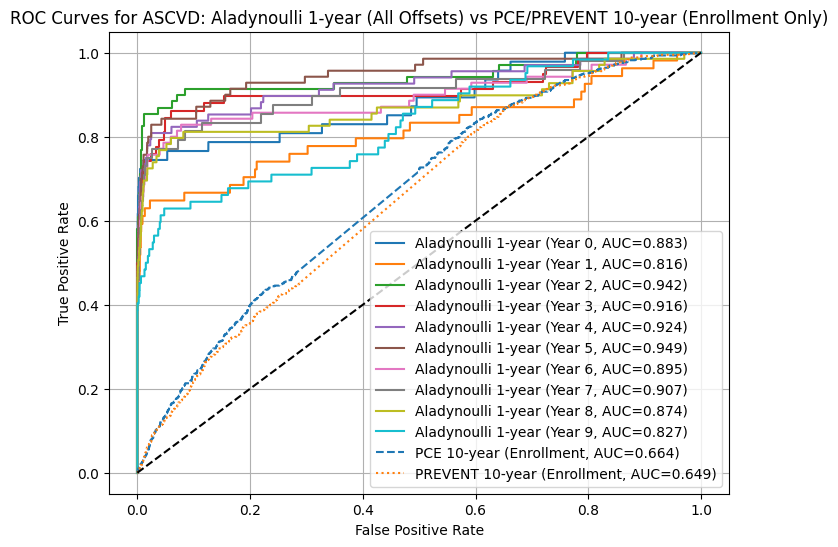

In [22]:
pi_batches = [
   torch.load(f"/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pi_enroll_fixedphi_age_offset_{k}_sex_0_10000_try2_withpcs.pt")
   for k in range(10)
]


from evaluatetdccode import *
results = evaluate_major_diseases_rolling_1year_roc_curves(
    pi_batches, Y_100k, E_100k, disease_names, pce_df, plot_group='ASCVD'
)